## Libraries

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

## Making list of all csv files 

In [2]:
# changing our current directory where our csv files are saved
os.chdir("E:\Pandas-Sales-Analysis\SalesAnalysis\Sales_Data")

In [3]:
# only choosing files with .csv extension
extension = 'csv'

all_filenames = [i for i in glob.glob('*_2019.csv')]

# if we have not set this to current directory, then we have to pass all the files:
# Another way: all_filenames = [i for i in glob.glob("E:\Pandas-Sales-Analysis\SalesAnalysis\Sales_Data\January_2019.csv")]

all_filenames

['April_2019.csv',
 'August_2019.csv',
 'December_2019.csv',
 'February_2019.csv',
 'January_2019.csv',
 'July_2019.csv',
 'June_2019.csv',
 'March_2019.csv',
 'May_2019.csv',
 'November_2019.csv',
 'October_2019.csv',
 'September_2019.csv']

## Merging 12 months data into single csv file

In [4]:
# Initialising empty data frame to store 12 months data
all_data = pd.DataFrame()

for f in all_filenames:
    df = pd.read_csv(f) 
   
    all_data = pd.concat([all_data,df])
    # pd.concat([ 1. df: where to concatenate into, 2. df which you want to add in first data frame ])

# changing a data frame to csv file using .to_csv
all_data.to_csv( "combined_data.csv", index=False)
# dataframe_name.to_csv('csv_file_name')

print("Size of merged data frame: ",all_data.shape)

all_data.shape

Size of merged data frame:  (186849, 6)


(186849, 6)

# Cleaning or data

## Columns with missing values

In [5]:
missing_values = all_data.isna().any()
missing_values

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

## Rows with missing values

In [6]:
missing_val_2 = all_data[all_data.isnull().any(axis=1)]
missing_val_2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


## Number of rows with mising values 

In [7]:
rows,columns = missing_val_2.shape
rows

544

## Deleting only those rows which are totally NAN 

In [8]:
all_data.dropna(axis=0,how='all',inplace=True)

## Checking NAN values  

In [9]:
check_nan = all_data.isnull().any()
check_nan

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

# Converting Order Date(string datatype) to DateTime format
## It gives parser error when we are trying to convert month column to DateTime format

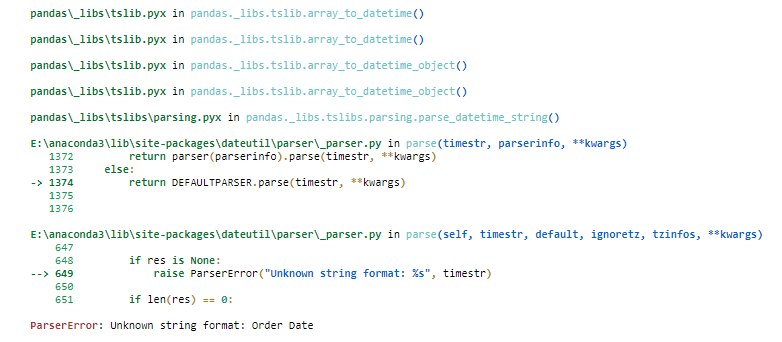

In [10]:
from IPython.display import Image
Image(filename =r'E:\eCommerce-Sales-Analysis\Images\error1.png')

## There is still some problematic rows, we have to clean them. 

In [11]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'].sample(20)

2339     08
14279    07
11211    08
11393    04
4593     04
21799    12
10526    06
15448    11
18238    12
963      04
11770    08
6394     12
19312    10
10282    09
22166    12
2015     05
16556    10
586      12
16280    10
11082    12
Name: month, dtype: object

## There is presence of string 'Or' in month column, we have to clean it 
## That's why we are facing errors while converting data type

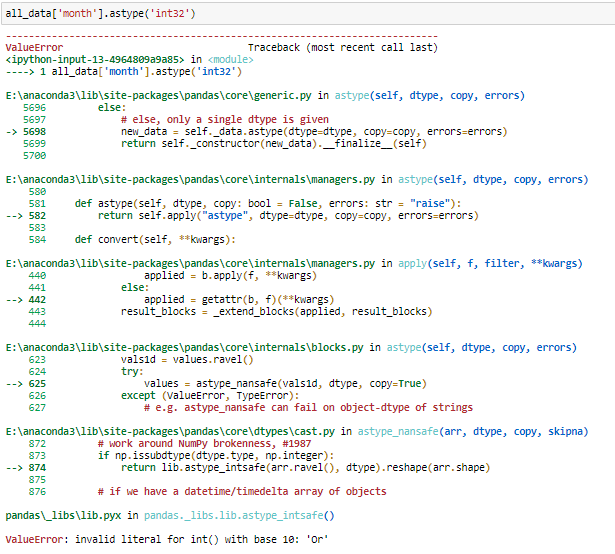

In [12]:
from IPython.display import Image
Image(filename =r'E:\eCommerce-Sales-Analysis\Images\error2.png')

# Cleaning Data - 2
## Removing 'Or' from month column

In [13]:
# Only putting those rows which doesn't contain 'Or' in month section
all_data = all_data[~all_data['month'].str.contains("Or")]
# Putting ~ works as an invert

# Another way: all_data = all_data[all_data['Month'].str[0:] != "Or"]

In [14]:
all_data['month'].str.contains("Or").any()

False

## Converting datatype of columns

In [15]:
all_data['month'] = all_data['month'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Order ID'] = all_data['Order ID'].astype('int32')

# What was the best month for sales?

## Calculating total sales  

In [16]:
# Making a total_sales column
all_data['total_sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
val = all_data.groupby(['month']).agg({'total_sales':'sum'})
val.round(2)

,total_sales
month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


In [17]:
all_data.sample(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales
12070,234463,Wired Headphones,1,11.99,07/20/19 15:25,"292 7th St, Los Angeles, CA 90001",7,11.99
12210,307314,Wired Headphones,1,11.99,12/27/19 21:37,"954 10th St, Los Angeles, CA 90001",12,11.99
4004,145030,Wired Headphones,2,11.99,01/02/19 18:24,"151 Cherry St, New York City, NY 10001",1,23.98
13140,291350,Wired Headphones,1,11.99,11/17/19 20:42,"411 River St, New York City, NY 10001",11,11.99
7146,200879,27in FHD Monitor,1,149.99,05/23/19 09:08,"541 Chestnut St, San Francisco, CA 94016",5,149.99
9875,185987,Lightning Charging Cable,2,14.95,04/20/19 20:12,"802 Hill St, New York City, NY 10001",4,29.90
14629,208012,iPhone,1,700.00,05/28/19 10:34,"878 Church St, Los Angeles, CA 90001",5,700.00


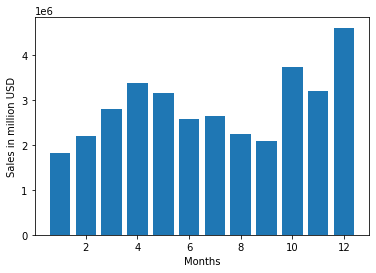

In [18]:
months = [month for month,data in all_data.groupby(['month'])]
# Method2: months = range(1,13)

plt.bar(months,val['total_sales'])
plt.xlabel('Months')
plt.ylabel('Sales in million USD')
plt.show()

### December has highest sales of about 4.6 million USD

# What city sold the most product ?


In [19]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [20]:
all_data['city'].values

array([' Dallas', ' Boston', ' Los Angeles', ..., ' San Francisco',
       ' San Francisco', ' San Francisco'], dtype=object)

In [21]:
(all_data.values == 'Los Angeles').any()

False

## There are some whitespace character in 'city' column 

In [22]:
(all_data.values == ' Los Angeles').any()

True

## Removing whitespace character in 'city' column

In [23]:
all_data['city'] = all_data['city'].apply(lambda y: y.strip())

In [24]:
all_data['city'].values

array(['Dallas', 'Boston', 'Los Angeles', ..., 'San Francisco',
       'San Francisco', 'San Francisco'], dtype=object)

## Many states have same city names, so we have to report cities with their state name

In [25]:
def finding_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['city'] + all_data['Purchase Address'].apply(lambda x:'(' + finding_state(x) + ')')
all_data['city'].values

array(['Dallas(TX)', 'Boston(MA)', 'Los Angeles(CA)', ...,
       'San Francisco(CA)', 'San Francisco(CA)', 'San Francisco(CA)'],
      dtype=object)

## Total sales city wise in USD 

In [26]:
sales = all_data.groupby(['city']).agg({'total_sales':'sum'})
sales['total_sales'].round(2)

city
Atlanta(GA)          2795498.58
Austin(TX)           1819581.75
Boston(MA)           3661642.01
Dallas(TX)           2767975.40
Los Angeles(CA)      5452570.80
New York City(NY)    4664317.43
Portland(ME)          449758.27
Portland(OR)         1870732.34
San Francisco(CA)    8262203.91
Seattle(WA)          2747755.48
Name: total_sales, dtype: float64

In [27]:
cities = [city for city,data in all_data.groupby(['city'])]
cities

['Atlanta(GA)',
 'Austin(TX)',
 'Boston(MA)',
 'Dallas(TX)',
 'Los Angeles(CA)',
 'New York City(NY)',
 'Portland(ME)',
 'Portland(OR)',
 'San Francisco(CA)',
 'Seattle(WA)']

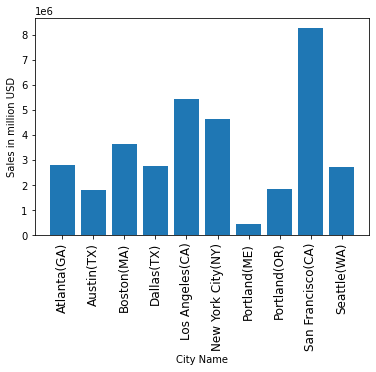

In [28]:
plt.bar(cities,sales['total_sales'])
plt.xticks(cities,rotation='vertical',size=12)
plt.xlabel('City Name')
plt.ylabel('Sales in million USD')
plt.style.use('ggplot')
plt.show()

### San Francisco,California have highest sales 

# What time should we display advertisements to maximize the likelihood of purchases?

In [29]:
# Converting column to date time format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [30]:
all_data['hours'] = all_data['Order Date'].dt.hour

no_of_sales = all_data.groupby(['hours']).agg({'Order ID':'count'})
no_of_sales

,Order ID
hours,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


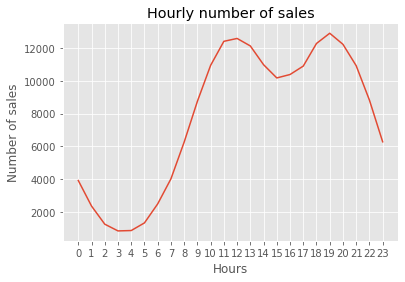

In [31]:
hours = [hour for hour,data in all_data.groupby(['hours'])]
# Method2: hours = range(0,24)

# line graph
plt.plot(hours,no_of_sales['Order ID'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of sales')
plt.title('Hourly number of sales')
plt.show()

### Sellers should advertise their product between or just before 11am to 1pm and 6pm to 8pm to increase their sales

# What time should we display advertisements to increase sales in Portland,ME 

In [32]:
citywise_data = all_data.groupby(['city','hours']).agg({'Order ID':'count'})
citywise_data

Order ID
city        hours          
Atlanta(GA) 0           310
            1           213
            2           113
            3            57
            4            80
...                     ...
Seattle(WA) 19          989
            20          988
            21          869
            22          693
            23          551

[240 rows x 1 columns]

## Hourly sales in Portland,ME

In [33]:
hourly_sales = citywise_data.iloc[citywise_data.index.get_level_values('city') == 'Portland(ME)']
# Another method: y = check.iloc[check.index.get_level_values(grouped_data_name='city' or grouped_data_level=0) == ' Atlanta (GA)']

hourly_sales

Order ID
city         hours          
Portland(ME) 0            48
             1            34
             2            14
             3            11
             4            11
             5            14
             6            40
             7            56
             8            83
             9           106
             10          158
             11          177
             12          161
             13          149
             14          143
             15          141
             16          138
             17          153
             18          163
             19          176
             20          156
             21          138
             22          121
             23           64

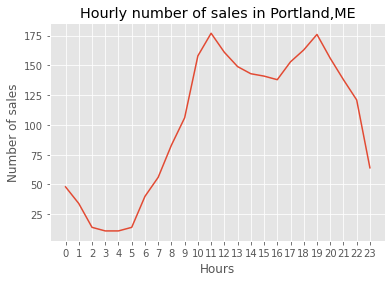

In [34]:
hours = [hour for hour,data in all_data.groupby(['hours'])]
plt.xlabel('Hours')
plt.xticks(hours)
plt.ylabel('Number of sales')
plt.title('Hourly number of sales in Portland,ME')
plt.plot(hours,hourly_sales.values)
plt.show()

In [35]:
# TODO: Conclusion from above graph

# What products are most often sold together?

In [36]:
multi_prod = all_data[all_data.duplicated(subset='Order ID',keep = False)]
print("Order ID's with multiple products:\n",multi_prod['Order ID'])

Order ID's with multiple products:
 2        176560
3        176560
17       176574
18       176574
29       176585
          ...  
11628    259303
11639    259314
11640    259314
11677    259350
11678    259350
Name: Order ID, Length: 14649, dtype: int32


In [37]:
multi_prod[multi_prod['Order ID'] == 176560]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city,hours
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14


In [38]:
multi_prod['m_order'] = multi_prod.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

<ipython-input-38-e28314af4e4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_prod['m_order'] = multi_prod.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


In [39]:
multi_prod.drop_duplicates(subset='Order ID',keep='last',inplace=True)

<ipython-input-39-53326f64130f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_prod.drop_duplicates(subset='Order ID',keep='last',inplace=True)


In [40]:
multi_prod[multi_prod['Order ID'] == 176560]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city,hours,m_order
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,"Google Phone,Wired Headphones"


In [80]:
from itertools import combinations
from collections import Counter

sublist_to_count = list()
holding_values = dict()

count = Counter()

for prod in multi_prod['m_order']:
    sublist_to_count = prod.split(',')
    count.update(combinations(sublist_to_count, 2))

for key,val in count.most_common(10):
    print(key,':',val)


('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92


### When a customer is buying a phone it is most likely that they will buy a charging cable and headphone with it.